Step 1:Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions

Step 2: Storing the dataset in a pandas dataframe

In [ ]:
df = pd.read_csv('advertising.csv')

Step 3: Understand the data

In [ ]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.shape

(200, 4)

Step 4: Data Visualizaton (Univariate)

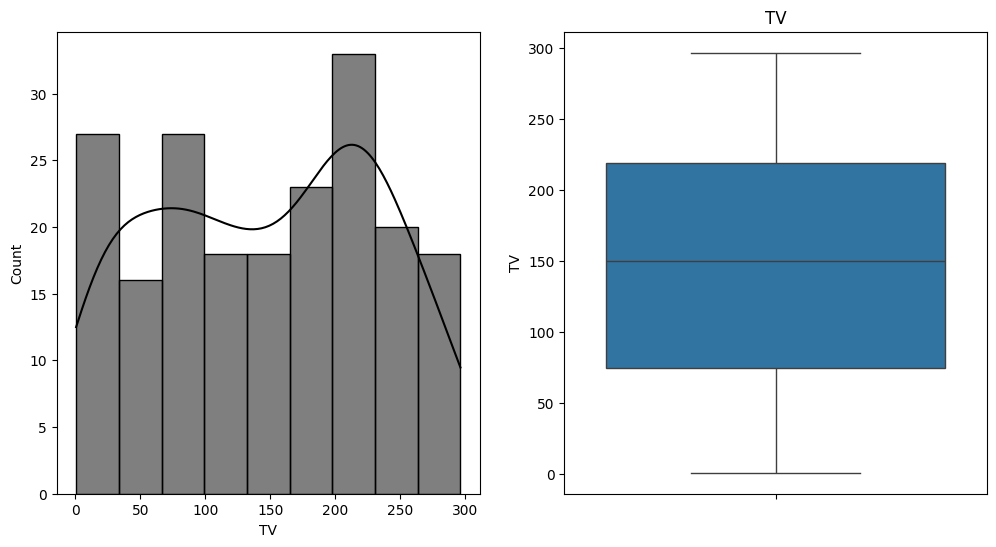

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df['TV'], kde=True, color='Black')
plt.subplot(1, 2, 2)
sns.boxplot(df['TV'])
plt.title('TV')
plt.show()

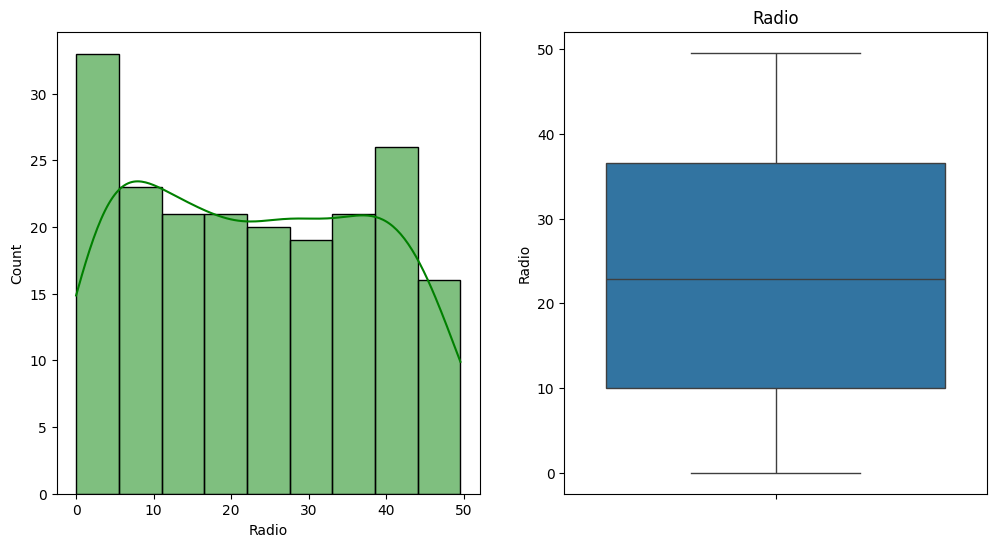

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df['Radio'], kde=True, color='Green')
plt.subplot(1, 2, 2)
sns.boxplot(df['Radio'])
plt.title('Radio')
plt.show()

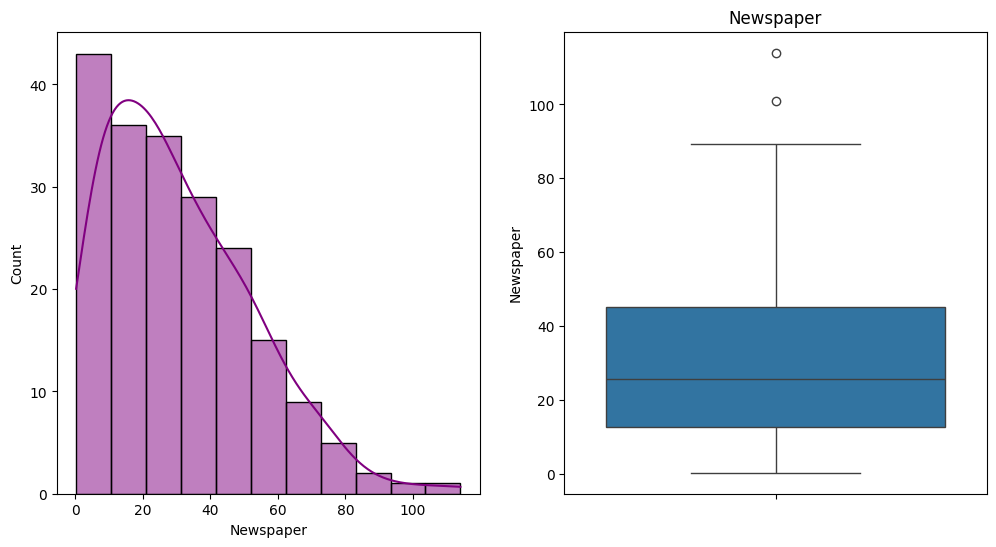

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df['Newspaper'], kde=True, color='purple')
plt.subplot(1, 2, 2)
plt.title('Newspaper')
sns.boxplot(df['Newspaper'])
plt.show()

Step 5: Removing outliers from Newspaper column, as detected from Newspaper's boxplot

In [ ]:
df['Newspaper'].describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

Step 5(a): Since there are only two outliers, we can remove them

In [ ]:
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(f"Q3: {Q3} \nQ1: {Q1} \nIQR: {IQR}")
print(f"Lower bound: {lower_limit}")
print(f"Upper bound: {upper_limit}")

Q3: 45.1 
Q1: 12.75 
IQR: 32.35
Lower bound: -35.775000000000006
Upper bound: 93.625


In [ ]:
df[df['Newspaper'] > upper_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [ ]:
df[df['Newspaper'] < lower_limit]

,TV,Radio,Newspaper,Sales


Step 5(b): There are only postive outliers, therefore just removing them

In [ ]:
new_df = df[df['Newspaper'] < upper_limit]
print(f"Shape before: {df.shape}")
print(f"Shape after: {new_df.shape}")

Shape before: (200, 4)
Shape after: (198, 4)


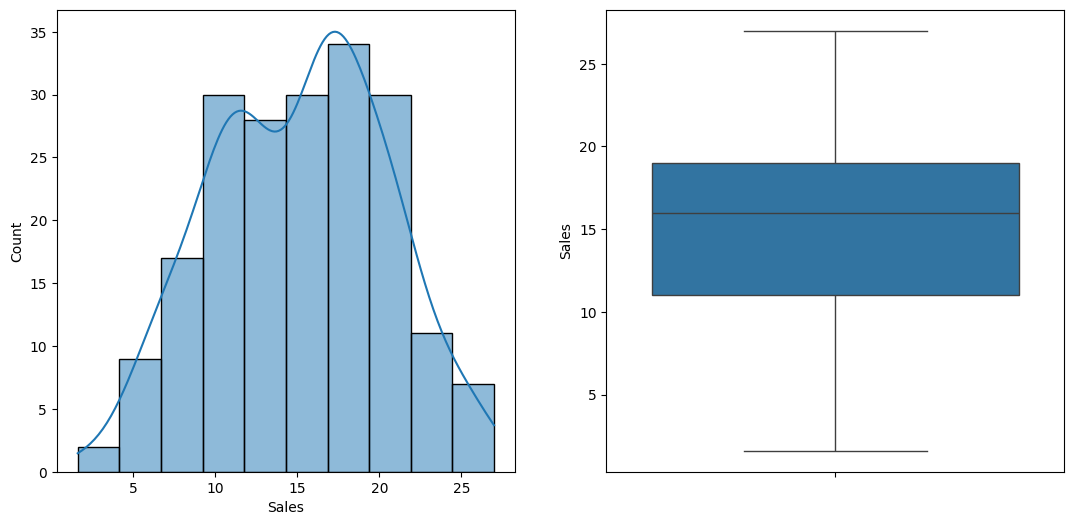

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1, 2, 1)
sns.histplot(new_df['Sales'], kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(new_df['Sales'])
plt.show()

Step 5(c): Showing the difference after removing outliers

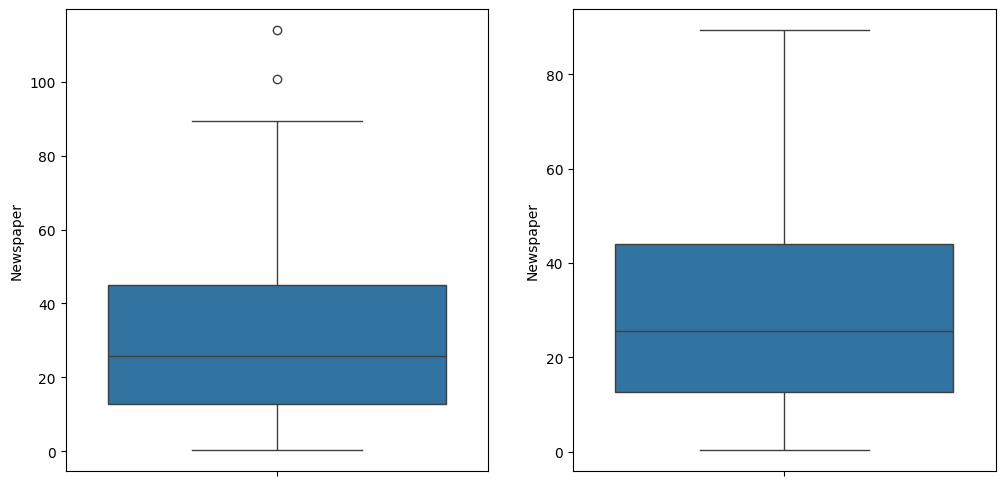

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.boxplot(df['Newspaper'])
plt.subplot(1, 2, 2)
sns.boxplot(new_df['Newspaper'])
plt.show()

Step 6: Plotting all features vs target scatterplot

Text(0.5, 1.0, 'TV vs Sales')

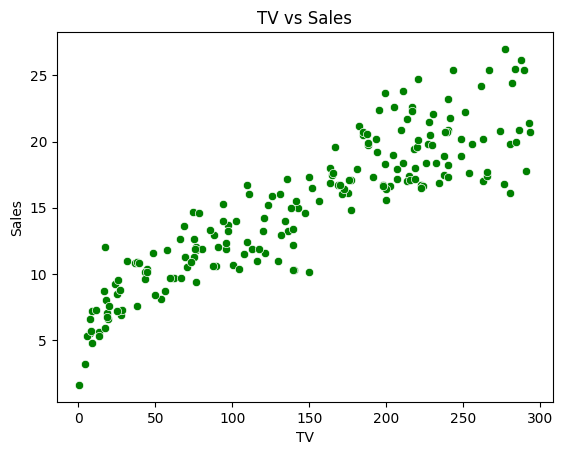

In [ ]:
sns.scatterplot(x='TV', y='Sales', data=new_df, color='Green')
plt.title('TV vs Sales')

Text(0.5, 1.0, 'Radio vs Sales')

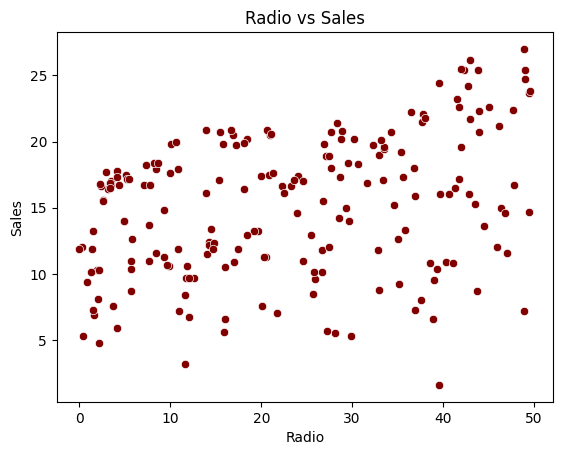

In [ ]:
sns.scatterplot(x='Radio', y='Sales', data=new_df, color='Maroon')
plt.title('Radio vs Sales')

Text(0.5, 1.0, 'Newspaper vs Sales')

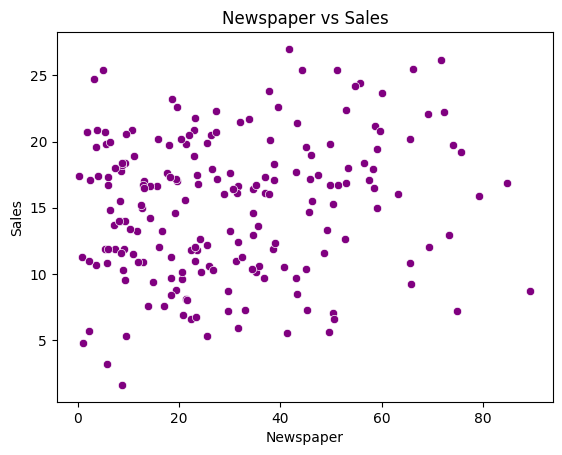

In [ ]:
sns.scatterplot(x='Newspaper', y='Sales', data=new_df, color='Purple')
plt.title('Newspaper vs Sales')

Step 7: Since we are having a small dataset (198, 4) we apply train_test_split method to regression algorithms

In [ ]:
X = new_df.iloc[:, :-1]
Y = new_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y.to_frame(), test_size=0.2, random_state=42)

Step 8(a): Use Linear Regression algorithm

In [ ]:
lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False) #Passed parameters are already pre-defines
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)
print(f"MSE: {lr_mse}")
print(f"R2: {lr_r2}")
print(f"Coefficients: {lr.coef_}")

MSE: 2.415728945593508
R2: 0.9130003152798273
Coefficients: [[0.05395925 0.10101512 0.00746937]]


In [ ]:
ridge = Ridge(alpha=2)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rg_mse = mean_squared_error(y_test, y_pred)
rg_r2 = r2_score(y_test, y_pred)
print(f"MSE: {rg_mse}")
print(f"R2: {(np.round(rg_r2, 4))*100}")
print(f"Coefficients: {ridge.coef_}")

MSE: 2.415805940673521
R2: 91.3
Coefficients: [[0.05395919 0.1010086  0.00747098]]


In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lo_mse = mean_squared_error(y_test, y_pred)
lo_r2 = r2_score(y_test, y_pred)
print(f"MSE: {lo_mse}")
print(f"R2: {lo_r2}")
print(f"Coefficients: {lasso.coef_}")

MSE: 2.4215738447610655
R2: 0.9127898179946388
Coefficients: [0.05387228 0.09726739 0.00624197]


Step 9: Using user based input predictions

In [ ]:
#'TV', 'Radio', 'Newspaper', 'Sales'
custom_data = {
    'TV': [],
    'Radio': [],
    'Newspaper': []
}

input_values = input("Enter the values separated by spaces: ")

values = input_values.split()
for i in range(0,len(values), 3):
    custom_data['TV'].append(float(values[0]))
    custom_data['Radio'].append(float(values[1]))
    custom_data['Newspaper'].append(float(values[2]))

# Convert the dictionary to a DataFrame
custom_df = pd.DataFrame(custom_data)

print(custom_df)
prediction1 = lr.predict(custom_df)
prediction2 = ridge.predict(custom_df)
prediction3 = lasso.predict(custom_df)
print(f"Linear Regression Prediction: {(np.array2string(prediction1)).strip('[]')}")
print(f"Ridge Regression Prediction: {(np.array2string(prediction2)).strip('[]')}")
print(f"Lasso Regression Prediction: {(np.array2string(prediction3)).strip('[]')}")

Enter the values separated by spaces: 292.9 28.3 43.2
      TV  Radio  Newspaper
0  292.9   28.3       43.2
Linear Regression Prediction: 23.60976365
Ridge Regression Prediction: 23.60974246
Lasso Regression Prediction: 23.56106055


In [ ]:
lr_pickle = open('lr_model.pkl', 'wb')
pickle.dump(lr, lr_pickle)
lr_pickle.close()

ridge_pickle = open('ridge_model.pkl', 'wb')
pickle.dump(ridge, ridge_pickle)
ridge_pickle.close()

lasso_pickle = open('lasso_model.pkl', 'wb')
pickle.dump(lasso, lasso_pickle)
lasso_pickle.close()